In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
from scipy.stats import norm, expon
from math import sqrt, pi, exp

# Set the seed
np.random.seed(10)

E:\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
E:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
E:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Importance sampling method

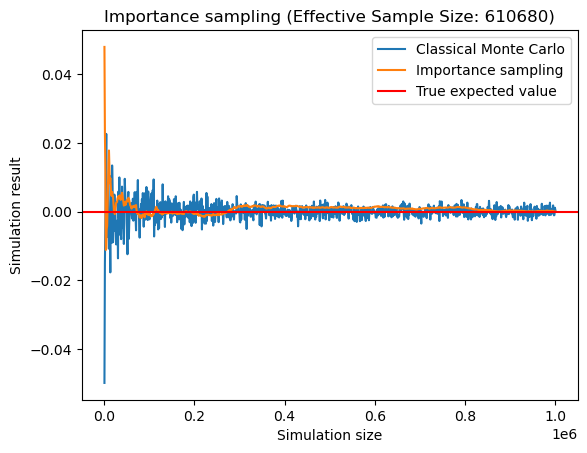

In [2]:
# Define target function f
def f(x):
    return norm.pdf(x)
# Define proposal kernel g
def g(x):
    return norm.pdf(x, loc=1, scale=np.sqrt(3))

# Sample size
SIZE = 10 ** 6

# Draw samples from g
proposal_samples = np.array(norm.rvs(loc=1, scale=np.sqrt(3), size=SIZE))

# Calculate importance sampling weights
weights = f(proposal_samples) / g(proposal_samples)

# Calculate effective sample size
ess = (np.sum(weights) ** 2) / np.sum(weights ** 2)

# Calculate expected value for different simulation sizes
simulation_sizes = [1000 * i for i in range(1, 1001)]
importance_sampling_results = []
classical_monte_carlo_results = []
for size in simulation_sizes:
    importance_sampling_results.append(np.sum(weights[:size] * proposal_samples[:size]) / size)
    classical_monte_carlo_results.append(np.mean(norm.rvs(size=size)))

# Plot results
plt.plot(simulation_sizes, classical_monte_carlo_results, label="Classical Monte Carlo")
plt.plot(simulation_sizes, importance_sampling_results, label="Importance sampling")
plt.axhline(y=0, color='r', linestyle='-', label="True expected value")
plt.legend(loc="upper right")
plt.xlabel("Simulation size")
plt.ylabel("Simulation result")
plt.title(f"Importance sampling (Effective Sample Size: {ess:.0f})")

plt.show()


## Rejection sampling

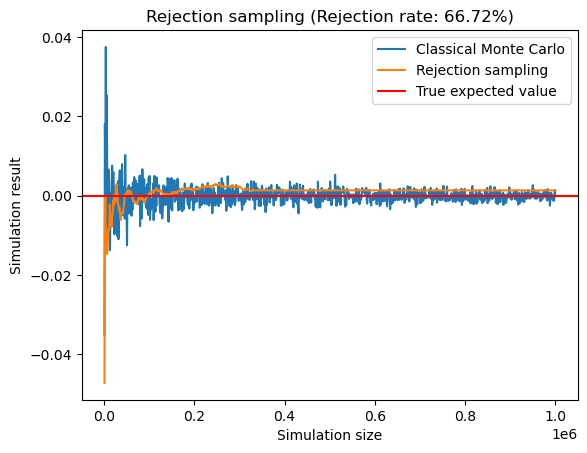

In [3]:
# Define target distribution
def f(x):
    return norm.pdf(x)

# Define proposal distribution 
def g(x):
    return norm.pdf(x, loc=1, scale=np.sqrt(3))

M = 3
N = 10**6

accepted = []
rejected = []

for i in range(N):
    y = np.random.normal(loc=1, scale=np.sqrt(3))
    u = np.random.uniform(0, 1)

    # Accept-reject method. Appends sample y to accepted or rejected list.
    if u <= f(y) / (M * g(y)):
        accepted.append(y)
    else:
        rejected.append(y)

rejection_rate = len(rejected) / N * 100

# Calculate expected values for different simulation sizes
simulation_sizes = [1000 * i for i in range(1, 1001)]
rejection_sampling_results = []
classical_monte_carlo_results = []
for size in simulation_sizes:
    rejection_sampling_results.append(np.mean(accepted[:size]))
    classical_monte_carlo_results.append(np.mean(norm.rvs(size=size)))

# Plot results
plt.plot(simulation_sizes, classical_monte_carlo_results, label="Classical Monte Carlo")
plt.plot(simulation_sizes, rejection_sampling_results, label="Rejection sampling")
plt.axhline(y=0, color='r', linestyle='-', label="True expected value")
plt.legend(loc="upper right")
plt.xlabel("Simulation size")
plt.ylabel("Simulation result")
plt.title(f"Rejection sampling (Rejection rate: {rejection_rate:.2f}%)")

plt.show()

## Independence sampler

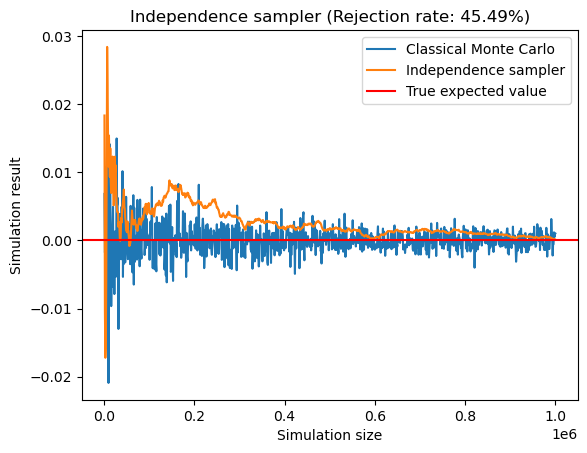

In [4]:
# Define target distribution f 
def f(x):
    return norm.pdf(x)

# Define proposal distribution g 
def g(x):
    return norm.pdf(x, loc=1, scale=np.sqrt(3))

# Sample size
SIZE = 10 ** 6

# Initialize samples
samples = [0]
accepted = 0

# Perform the independence sampler
for i in range(SIZE - 1):
    x = samples[-1]
    z = np.random.normal(loc=1, scale=np.sqrt(3))   
    a = min(1, (f(z) * g(x)) / (f(x) * g(z)))
    u = np.random.uniform(0, 1)    
    if u < a:
        samples.append(z)
        accepted += 1
    else:
        samples.append(x)

rejection_rate = 100 - (accepted / SIZE * 100)

# Compute the expected values
simulation_sizes = [1000 * i for i in range(1, 1001)]
independence_sampling_results = []
classical_monte_carlo_results = []
for size in simulation_sizes:
    independence_sampling_results.append(np.mean(samples[:size]))
    classical_monte_carlo_results.append(np.mean(norm.rvs(size=size)))

# Plot the results
plt.plot(simulation_sizes, classical_monte_carlo_results, label="Classical Monte Carlo")
plt.plot(simulation_sizes, independence_sampling_results, label="Independence sampler")
plt.axhline(y=0, color='r', linestyle='-', label="True expected value")
plt.legend(loc="upper right")
plt.xlabel("Simulation size")
plt.ylabel("Simulation result")
plt.title(f"Independence sampler (Rejection rate: {rejection_rate:.2f}%)")

plt.show()

# RWMH algorithm

In [5]:
# RWMH algorithm function
def rwmh(target, proposal, sigma, n_samples=10**4, burn_in=0):
    samples = np.zeros(n_samples + burn_in)
    current_sample = 0
    # Generate samples
    for i in range(n_samples + burn_in):
        proposal_sample = current_sample + proposal(sigma)
        acceptance_ratio = target(proposal_sample) / target(current_sample)
        if np.random.rand() < acceptance_ratio:
            current_sample = proposal_sample
        samples[i] = current_sample
    return samples[burn_in:]

In [6]:
# Function to plot trace plot and histogram for samples
def plot_rwmh(samples, sigma):
    plt.figure(figsize=(10, 4))
    # Trace plot
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(8000, 10000), samples[8000:10000])
    plt.xlabel("Iteration")
    plt.ylabel("Sample Value")
    plt.title(f"Trace Plot (σ = {sigma})")
    # Histogram of x and true density function
    plt.subplot(1, 2, 2)
    plt.hist(samples, bins=50, density=True, alpha=0.5, label="Samples")
    x_vals = np.linspace(-4, 4, 1000)
    plt.plot(x_vals, norm.pdf(x_vals), label="True Density")
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.legend(loc="upper left")
    plt.title(f"Histogram (σ = {sigma})")

    plt.tight_layout()
    plt.show()

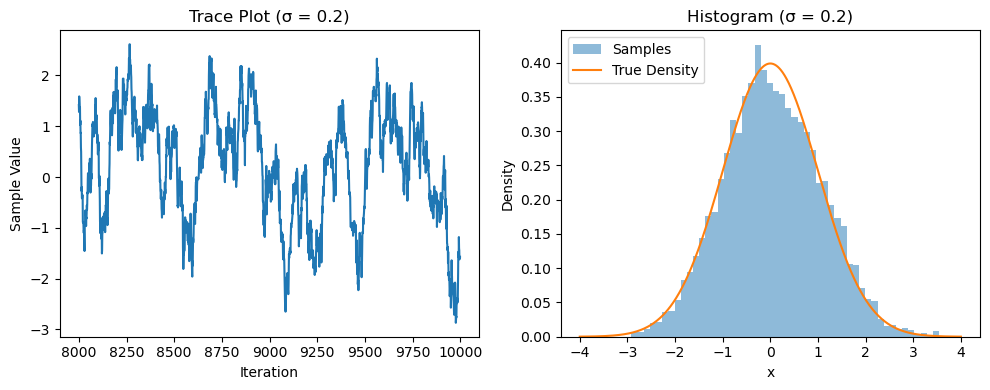

Integrated autocorrelation time for σ = 0.2: 80.68


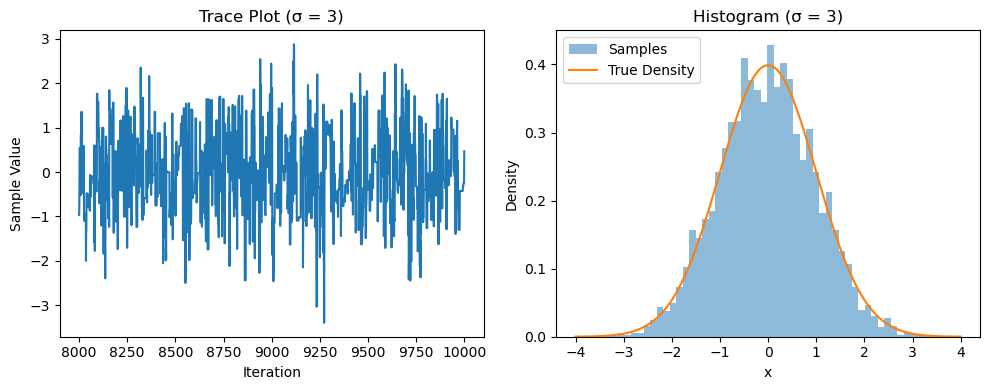

Integrated autocorrelation time for σ = 3: 4.27


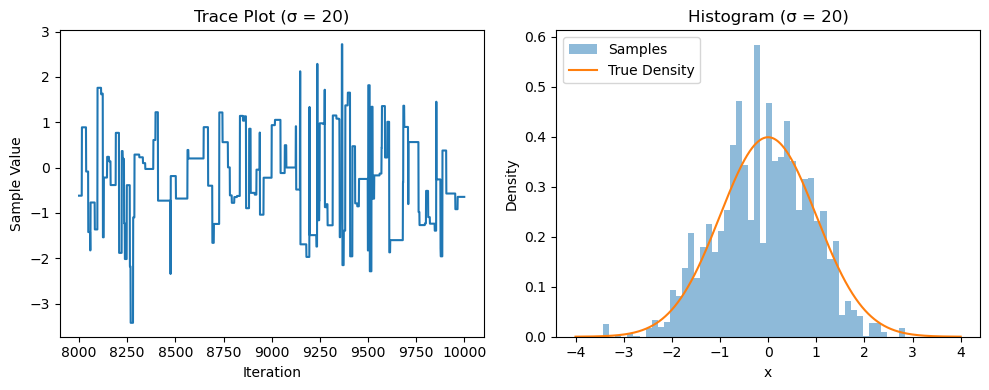

Integrated autocorrelation time for σ = 20: 18.44


In [7]:
# Target distribution (standard Gaussian)
target = lambda x: norm.pdf(x)
# Proposal distribution
proposal = lambda sigma: np.random.normal(0, sigma)
# Perform RWMH and plot results for each sigma value
sigmas = [0.2, 3, 20]
for sigma in sigmas:
    samples = rwmh(target, proposal, sigma)
    plot_rwmh(samples, sigma)  
    # Calculate the integrated autocorrelation time
    test_function = lambda x: x
    autocorr_time = emcee.autocorr.integrated_time(samples, c=1, quiet=True)
    print(f"Integrated autocorrelation time for σ = {sigma}: {float(autocorr_time):.2f}")
